<a href="https://colab.research.google.com/github/cormach/pymc3-bayesian-analysis-book/blob/main/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import statsmodels as sm
import scipy.stats as stats
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
%matplotlib inline

Chapter 2

In [ ]:
np.random.seed(123)
trials = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [ ]:
with pm.Model() as our_first_model:
  θ = pm.Beta('θ', alpha=1., beta=1.)
  y  = pm.Bernoulli('y',p= θ, observed=data)
  trace=pm.sample(1000, random_seed=123)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 8 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde10383f90>,
      dtype=object)

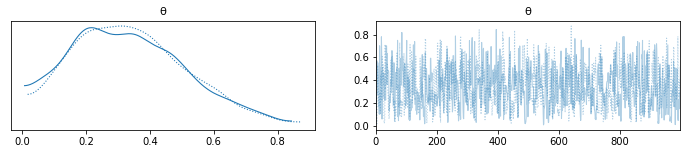

In [ ]:
az.plot_trace(trace)

In [ ]:
az.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.336,0.172,0.026,0.637,0.006,0.004,731.0,975.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


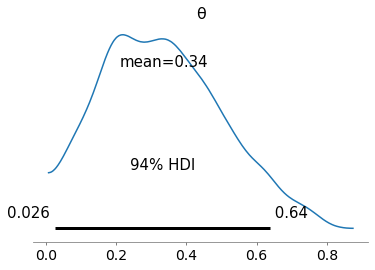

In [ ]:
az.plot_posterior(trace)

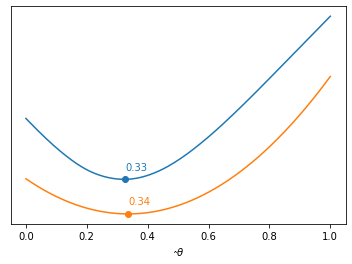

In [ ]:
grid = np.linspace(0,1,200)
θ_pos = trace['θ']
lossf_a = [np.mean(abs(i-θ_pos)) for i in grid]
lossf_b = [np.mean(abs(i-θ_pos)**2) for i in grid]

for lossf, c in zip ([lossf_a, lossf_b],['C0','C1']):
  mini = np.argmin(lossf)
  plt.plot(grid, lossf, c)
  plt.plot(grid[mini],lossf[mini],'o',color=c)
  plt.annotate('{:.2f}'.format(grid[mini]),
               (grid[mini], lossf[mini]+ 0.03), color=c)
  plt.yticks([])
  plt.xlabel(r'$\hat \theta$')

In [ ]:
print(f"mean: {np.mean(θ_pos)}; median: {np.median(θ_pos)}")

mean: 0.3359887424524105; median: 0.32390894266092074


The mean is a linear loss function - the median is a quadratic loss function?  You are imposing ad hoc loss functions when you use them is the claim by Bayesians

In [2]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [3]:
with pm.Model() as our_first_model:
  θ = pm.Beta("θ", alpha=1., beta=1.)
  y = pm.Bernoulli('y', p=θ, observed=data)
  trace=pm.sample(1000, random_seed=123)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc5e8b6050>,
      dtype=object)

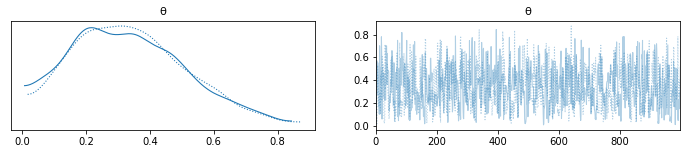

In [4]:
az.plot_trace(trace)

In [7]:
with pm.Model() as exercise_model:
  θ = pm.Uniform("θ", lower = -1., upper=2.)
  y = pm.Bernoulli('y', p=θ, observed=data)
  trace_exercise=pm.sample(1000, random_seed=123)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.
There were 142 divergences after tuning. Increase `target_accept` or reparameterize.
There were 287 divergences after tuning. Increase `target_accept` or reparameterize.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc5d737d50>,
      dtype=object)

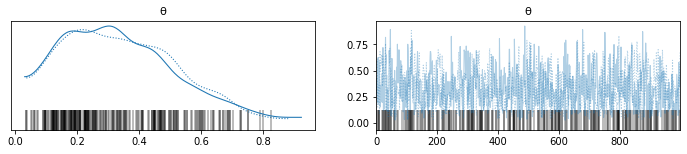

In [8]:
az.plot_trace(trace_exercise)

###Tips Dataset

In [11]:
url = "https://raw.githubusercontent.com/cormach/pymc3-bayesian-analysis-book/main/tips.csv"
tips = pd.read_csv(url)

In [33]:
[x for x in day_abbr]

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

array(['Sun', 'Sat', 'Thu', 'Fri'], dtype=object)

In [41]:
import calendar 
list(calendar.day_abbr)

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [54]:
from calendar import day_abbr
tips['day'] = tips['day'].replace('Thur','Thu')
tip = tips['tip'].values
idx = pd.Categorical(tips['day'],
                     categories=list(day_abbr)).codes -3 #get an index error without this
groups = len(np.unique(idx))

In [52]:
idx

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0], dtype=int8)

In [53]:
with pm.Model() as comparing_groups:
  μ =pm.Normal("μ", mu=0, sd=10, shape=groups)
  σ=pm.HalfNormal("σ", sd=10, shape=groups)
  y=pm.Normal('y',mu=μ[idx], sd=σ[idx], observed=tip)

In [55]:
with comparing_groups:
  trace_cg = pm.sample(5000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, μ]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 23 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4920c9790>,
      dtype=object)

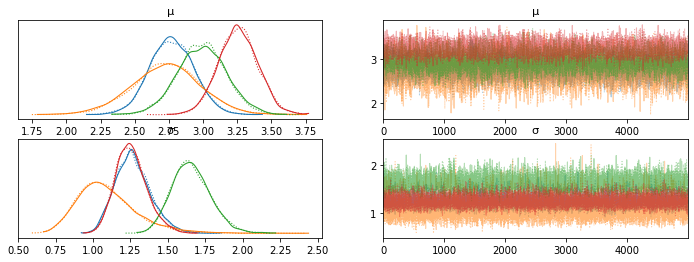

In [56]:
az.plot_trace(trace_cg)

### Coal Mining Transition

In [3]:
import pandas as pd

disaster_data = pd.Series(
    [4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
    3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
    2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
    1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
    0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
    3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
    0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
)

In [4]:
years = np.arange(1851, 1962)

In [7]:
with pm.Model() as disaster_model:
  switchpoint = pm.DiscreteUniform("switchpoint",
                                   lower = years.min(),
                                   upper=years.max(),
                                   testval=1900)
  early_rate = pm.Exponential("early_rate", 1.0)

  late_rate = pm.Exponential("late_rate", 1.0)
  rate = pm.math.switch(switchpoint>=years, early_rate, late_rate)

  disasters=pm.Poisson("disasters", rate, observed=disaster_data)

/usr/local/lib/python3.7/dist-packages/pymc3/model.py:1755: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [8]:
with disaster_model:
    trace = pm.sample(10000, return_inferencedata=False)


Sequential sampling (2 chains in 1 job)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 27 seconds.
The number of effective samples is smaller than 10% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd49804e390>,
      dtype=object)

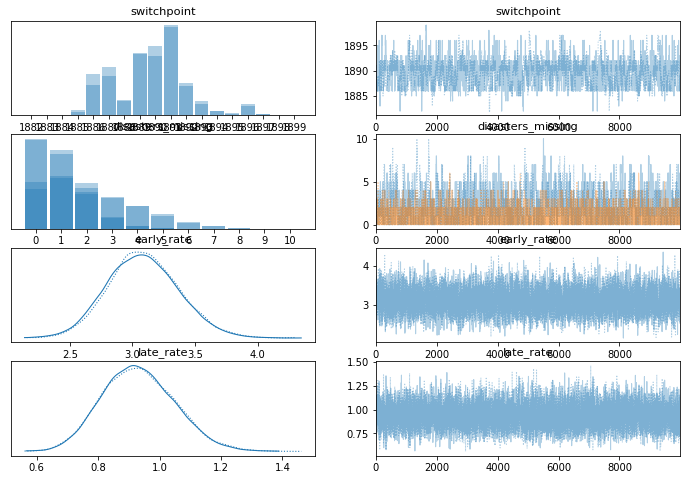

In [9]:
az.plot_trace(trace)

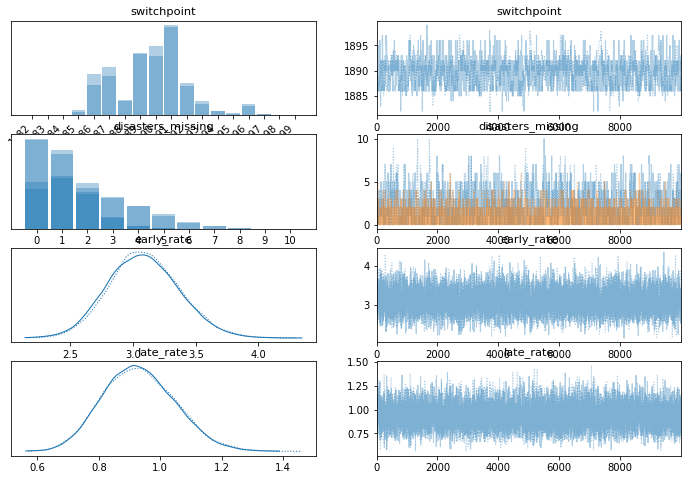

In [10]:
with disaster_model:
    axes_arr = az.plot_trace(trace)
plt.draw()
for ax in axes_arr.flatten():
    if ax.get_title() == "switchpoint":
        labels = [label.get_text() for label in ax.get_xticklabels()]
        ax.set_xticklabels(labels, rotation=45, ha="right")
        break
plt.draw()